In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [55]:
data=pd.read_csv('../clean_data/after_clean.csv')
data.head()

,Unnamed: 0,Year,Jurisdiction,Gender,Average scale score
0,0,2022,National,Male,214.0
1,1,2022,National,Female,221.0
2,2,2022,Alabama,Male,208.0
3,3,2022,Alabama,Female,218.0
4,4,2022,Alaska,Male,197.0


In [56]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data['Year'] = data['Year'].astype(str)
data.head()

,Year,Jurisdiction,Gender,Average scale score
0,2022,National,Male,214.0
1,2022,National,Female,221.0
2,2022,Alabama,Male,208.0
3,2022,Alabama,Female,218.0
4,2022,Alaska,Male,197.0


In [57]:
# find out teh jurisdiction 
states=data['Jurisdiction'].unique()
print(len(states))
print(states)

51
['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [58]:
# 5 states as a group for better plotting
states_1 = data['Jurisdiction'].unique()[:5]
states_2 = data['Jurisdiction'].unique()[5:10]
states_3 = data['Jurisdiction'].unique()[10:15]
states_4 = data['Jurisdiction'].unique()[15:20]
states_5 = data['Jurisdiction'].unique()[20:25]
states_6 = data['Jurisdiction'].unique()[25:30]
states_7 = data['Jurisdiction'].unique()[30:35]
states_8 = data['Jurisdiction'].unique()[35:40]
states_9 = data['Jurisdiction'].unique()[40:45]
states_10 = data['Jurisdiction'].unique()[45:]



In [59]:
# Pivot the data for plotting
pivot_data = data.pivot_table(index='Year', columns=['Jurisdiction', 'Gender'], values='Average scale score')

In [60]:
pivot_data.to_csv('../clean_data/pivot_data.csv')

In [61]:
pivot_data

Jurisdiction Alabama        Alaska        Arizona        Arkansas         \
Gender        Female   Male Female   Male  Female   Male   Female   Male   
Year                                                                       
2002           211.0  203.0  222.0  215.0   211.0  200.0    216.0  210.0   
2003           211.0  204.0  218.0  205.0   212.0  206.0    218.0  209.0   
2005           211.0  205.0  215.0  207.0   211.0  203.0    221.0  213.0   
2007           219.0  213.0  219.0  210.0   214.0  206.0    221.0  213.0   
2009           221.0  212.0  216.0  207.0   213.0  207.0    222.0  211.0   
2011           223.0  218.0  212.0  204.0   216.0  209.0    219.0  214.0   
2013           223.0  215.0  212.0  206.0   216.0  210.0    223.0  215.0   
2015           221.0  213.0  216.0  210.0   220.0  211.0    223.0  213.0   
2017           220.0  213.0  211.0  203.0   218.0  213.0    221.0  212.0   
2019           217.0  207.0  208.0  201.0   218.0  213.0    218.0  213.0   
2022           218.0  208.0  210.0  197.0   218.0  213.0    217.0  208.0   

Jurisdiction California         ... Virginia        Washington         \
Gender           Female   Male  ...   Female   Male     Female   Male   
Year                            ...                                     
2002              208.0  204.0  ...    227.0  223.0      227.0  220.0   
2003              209.0  202.0  ...    228.0  219.0      226.0  216.0   
2005              210.0  203.0  ...    228.0  223.0      228.0  219.0   
2007              213.0  204.0  ...    230.0  224.0      227.0  221.0   
2009              213.0  207.0  ...    230.0  223.0      226.0  217.0   
2011              214.0  209.0  ...    230.0  223.0      226.0  216.0   
2013              216.0  210.0  ...    232.0  225.0      228.0  222.0   
2015              216.0  210.0  ...    232.0  227.0      233.0  219.0   
2017              220.0  211.0  ...    229.0  226.0      226.0  220.0   
2019              221.0  212.0  ...    227.0  221.0      222.0  217.0   
2022              218.0  211.0  ...    221.0  208.0      219.0  214.0   

Jurisdiction West Virginia        Wisconsin        Wyoming         
Gender              Female   Male    Female   Male  Female   Male  
Year                                                               
2002                 221.0  217.0     222.0  215.0   224.0  219.0  
2003                 223.0  215.0     225.0  217.0   225.0  219.0  
2005                 218.0  211.0     224.0  219.0   226.0  221.0  
2007                 220.0  211.0     224.0  222.0   228.0  222.0  
2009                 218.0  211.0     224.0  217.0   226.0  219.0  
2011                 219.0  210.0     224.0  219.0   228.0  221.0  
2013                 219.0  211.0     225.0  216.0   229.0  223.0  
2015                 220.0  212.0     226.0  220.0   231.0  226.0  
2017                 222.0  213.0     223.0  217.0   230.0  224.0  
2019                 218.0  208.0     224.0  216.0   228.0  226.0  
2022                 207.0  204.0     222.0  213.0   226.0  223.0  

[11 rows x 102 columns]

In [62]:
def plot(sample_states):
    fig, axes = plt.subplots(nrows=1, ncols=len(sample_states), figsize=(5 * len(sample_states), 10), sharey=True)
    fig.suptitle('Average Mathematics Score By Gender Over Time for Selected States', fontsize=16)
    colors=['#C497B2','#14517C']
    y_min,y_max=200,250
# Loop through the states to create horizontal subplots
    for ax, state in zip(axes, sample_states):
        pivot_data[state].plot(ax=ax, marker='o',color=colors)
        ax.set_title(state)
        ax.set_xlabel('Year')
        ax.set_ylabel('Average Scale Score')
        ax.set_ylim(y_min,y_max)
        ax.legend(title='Gender')

# Adjust the layout
    plt.style.use('my_style')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

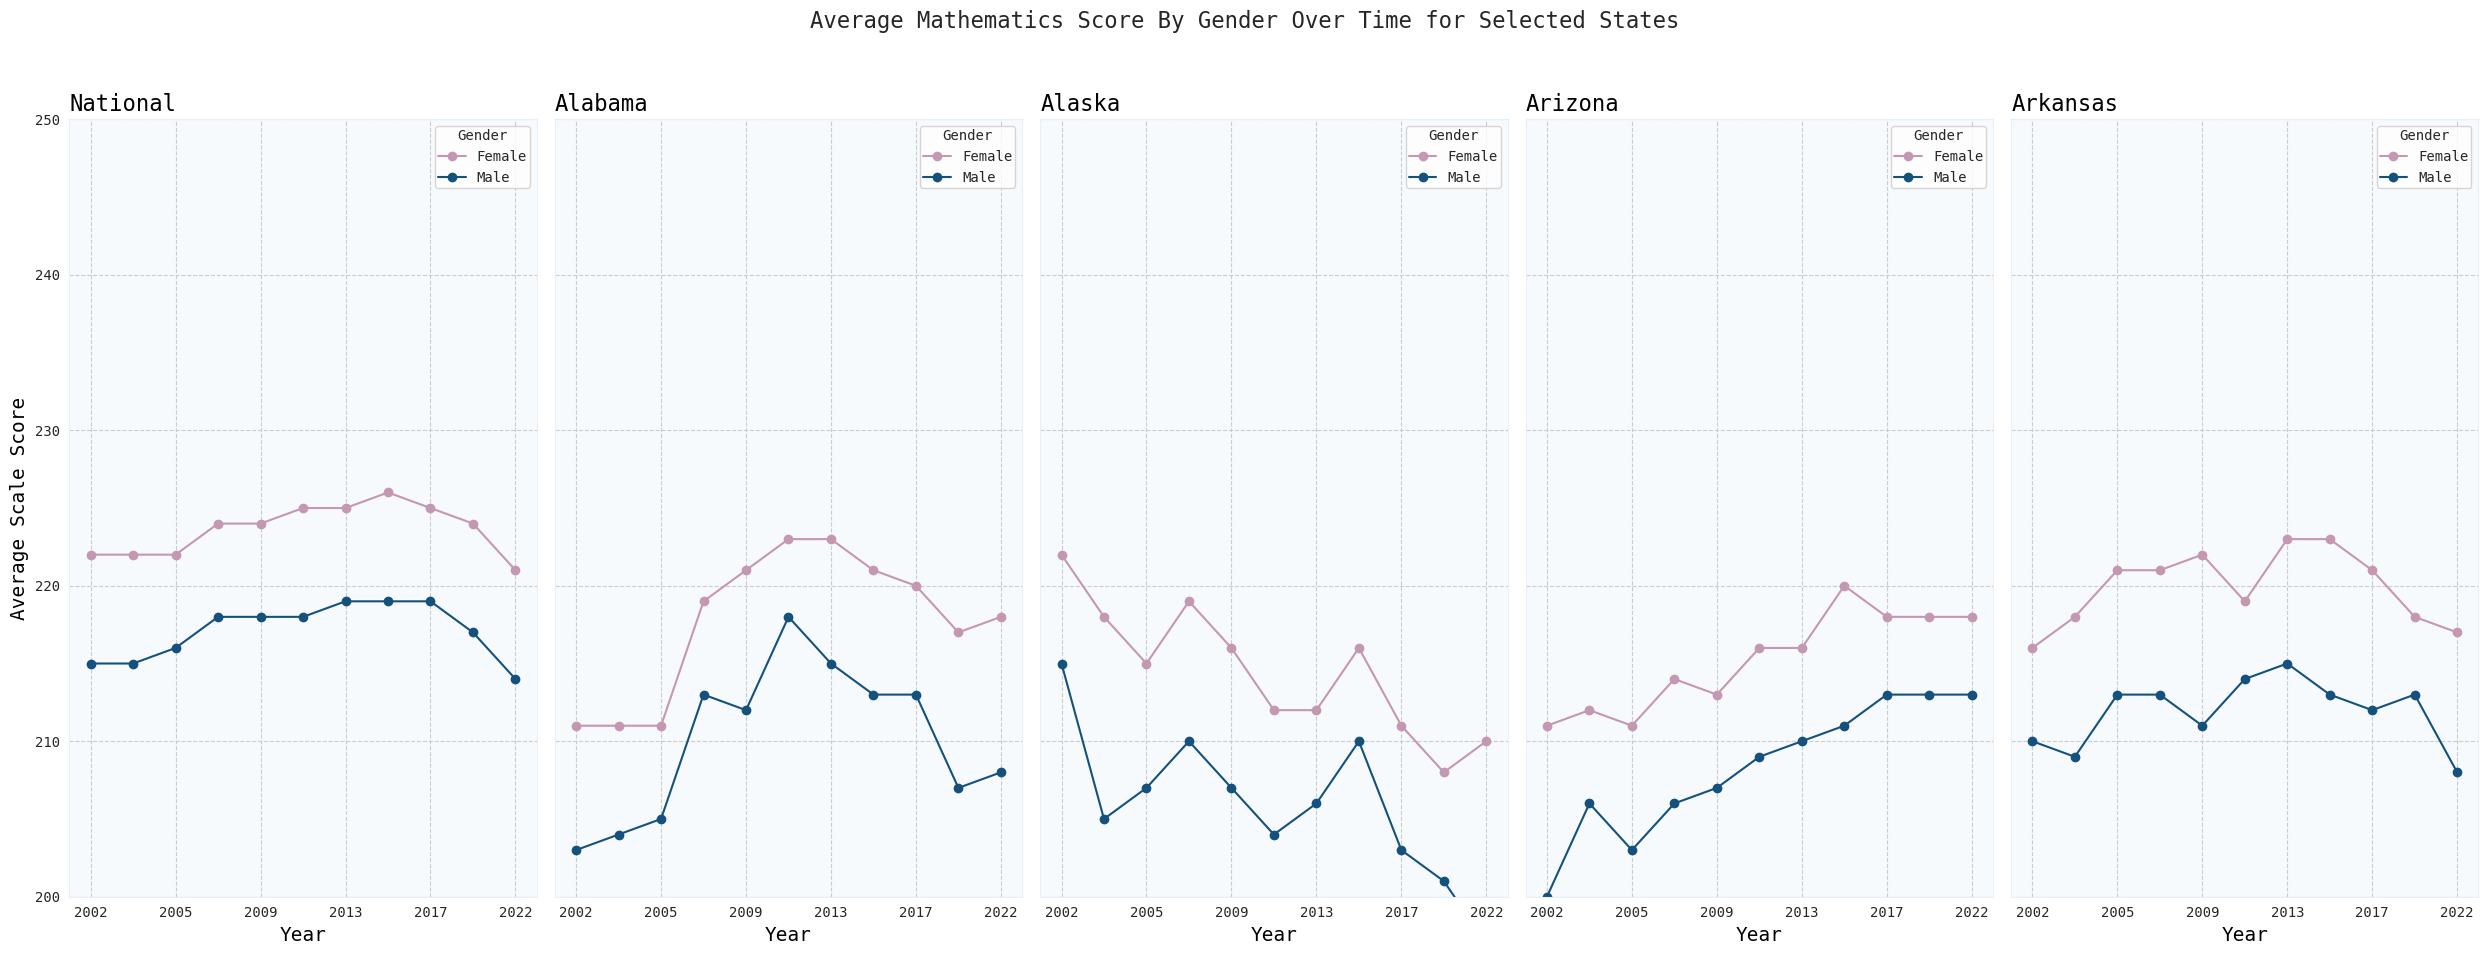

In [63]:
plot(states_1)

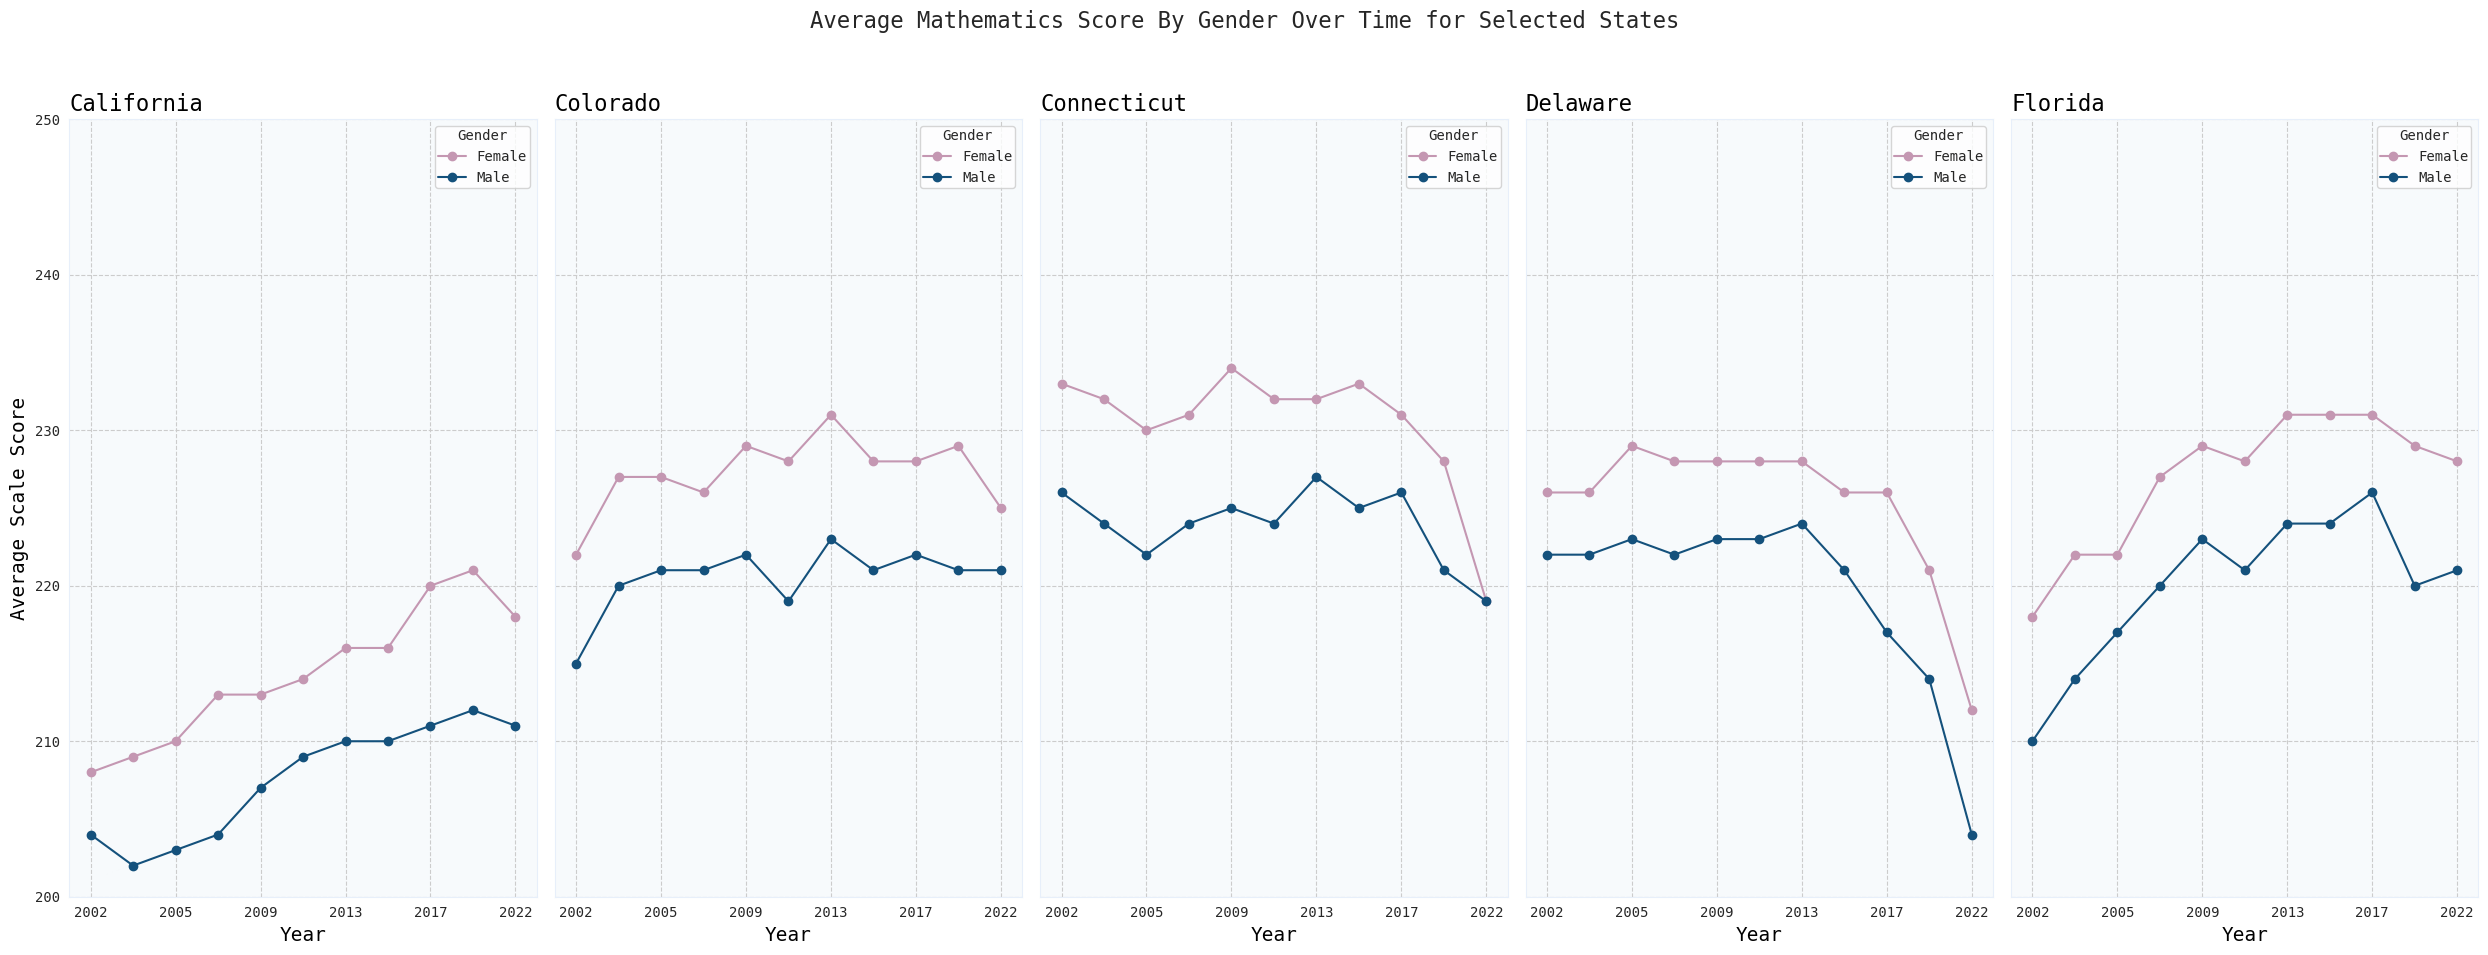

In [64]:
plot(states_2)

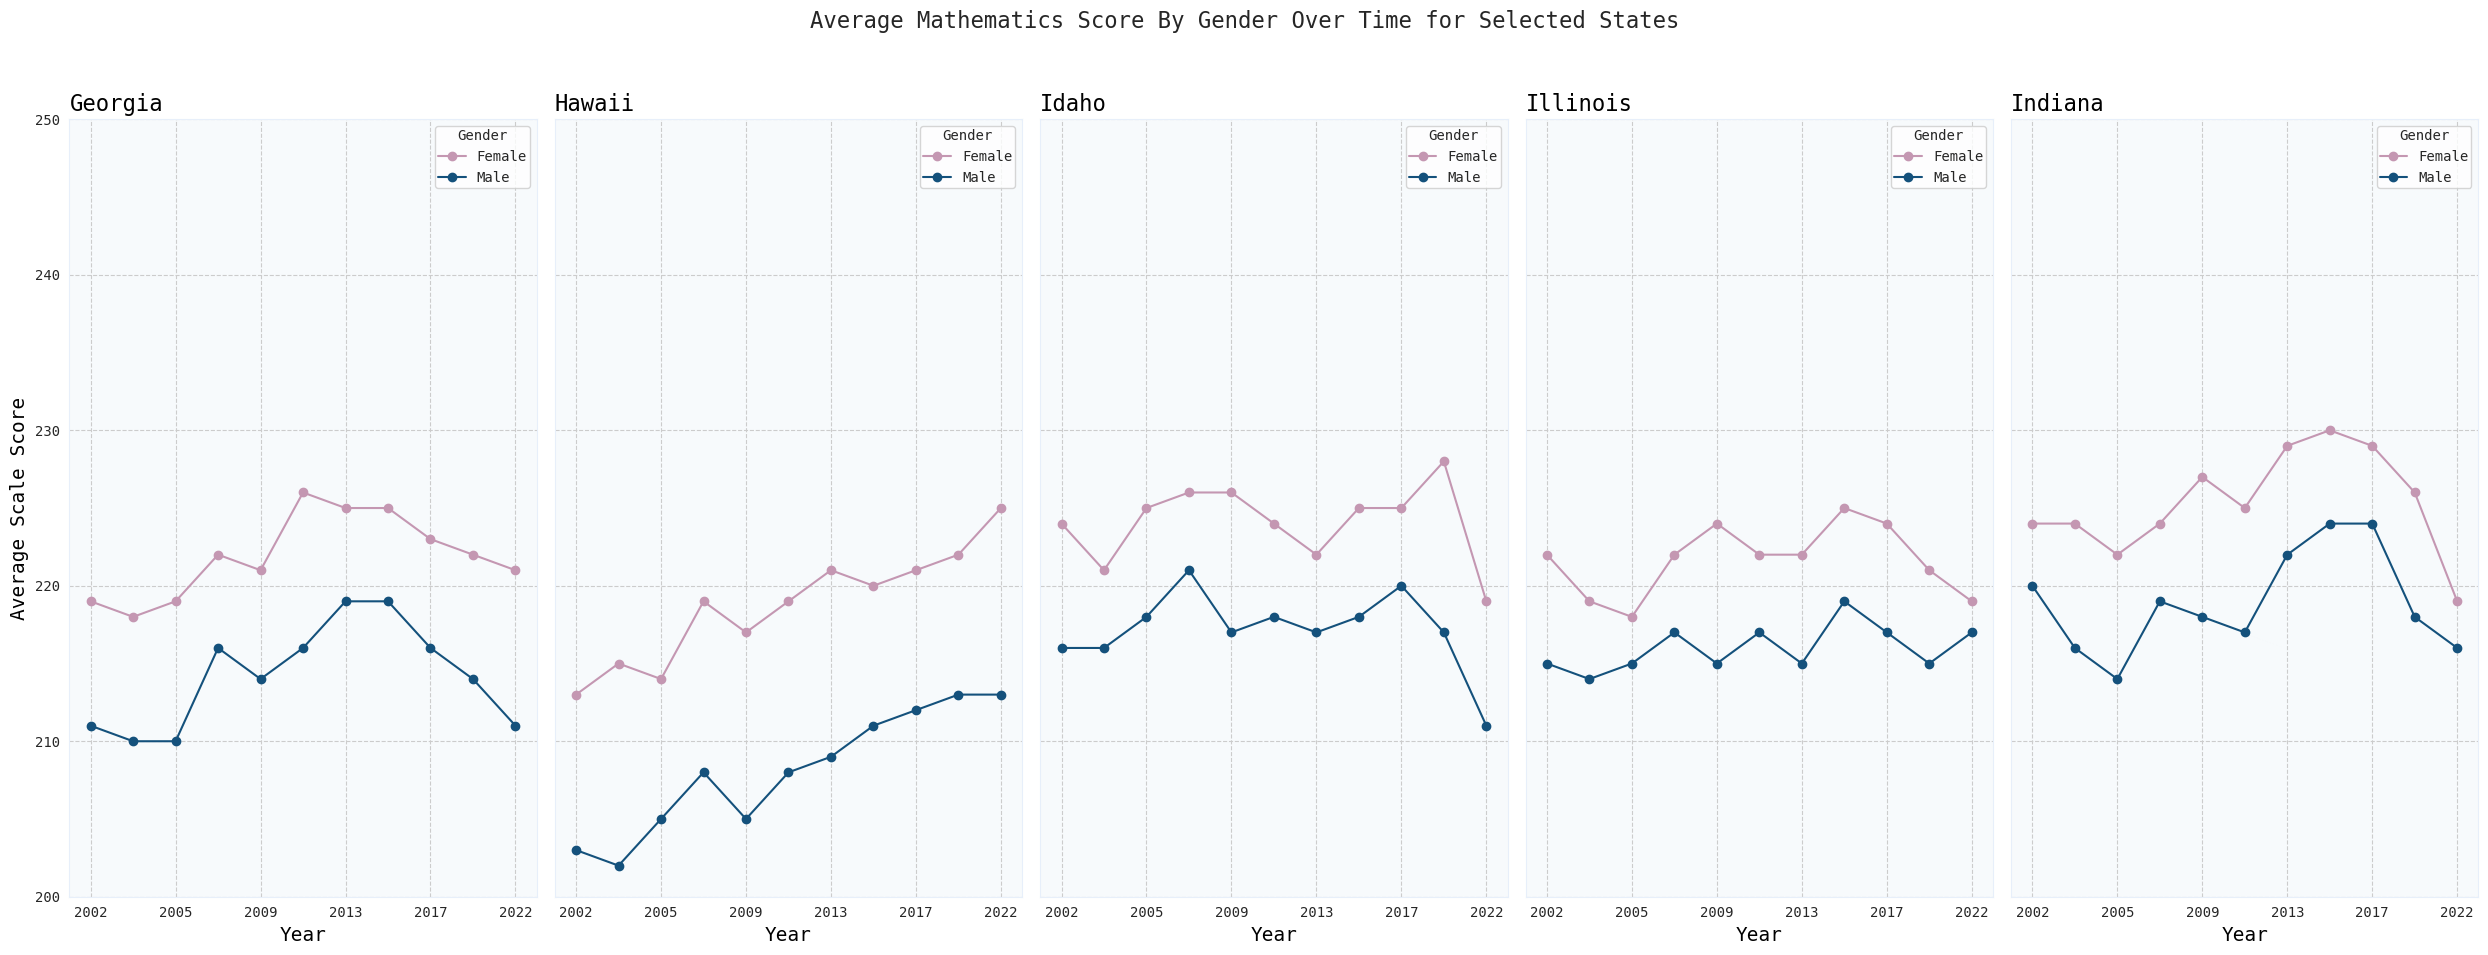

In [65]:
plot(states_3)

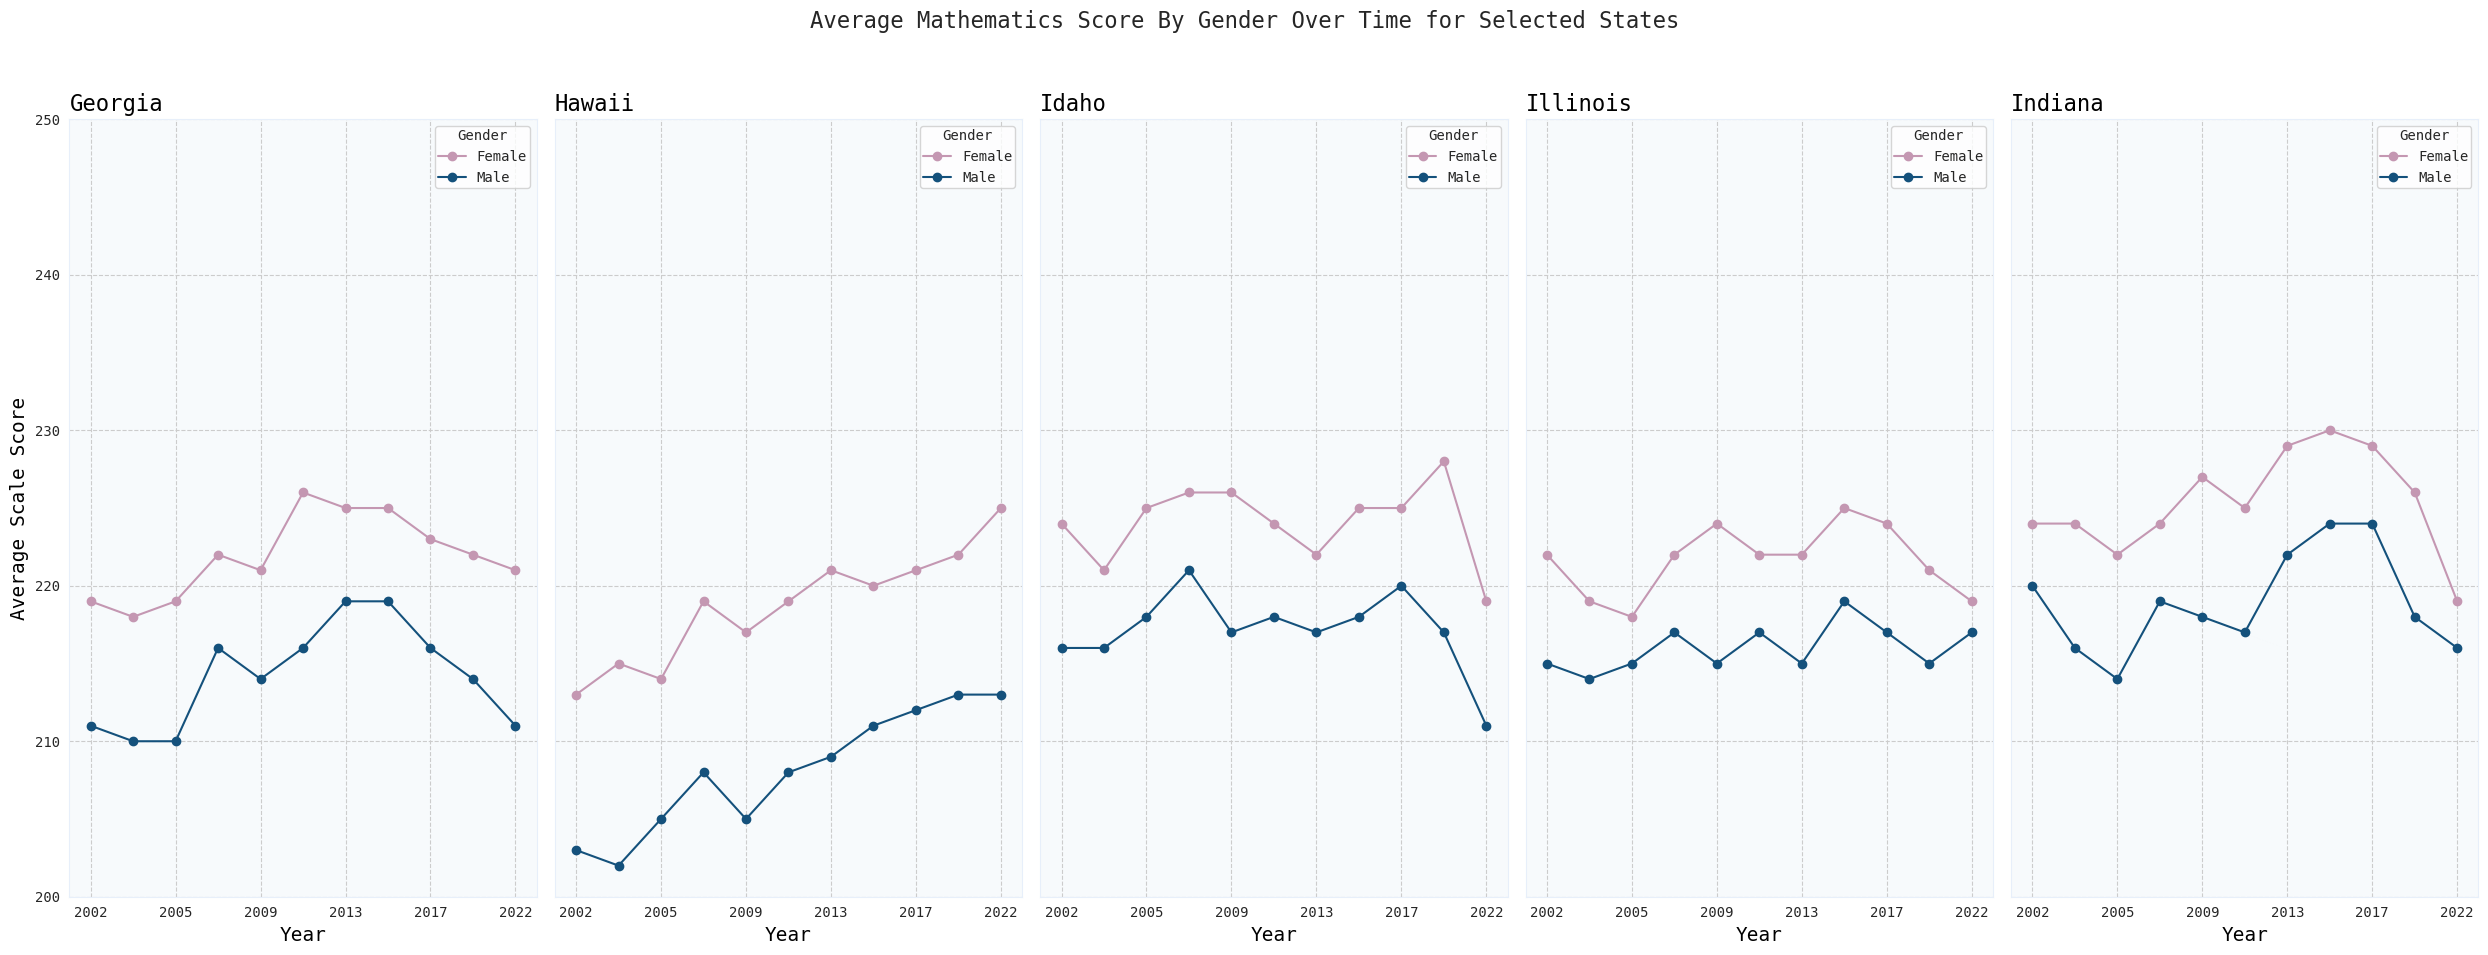

In [66]:
plot(states_3)

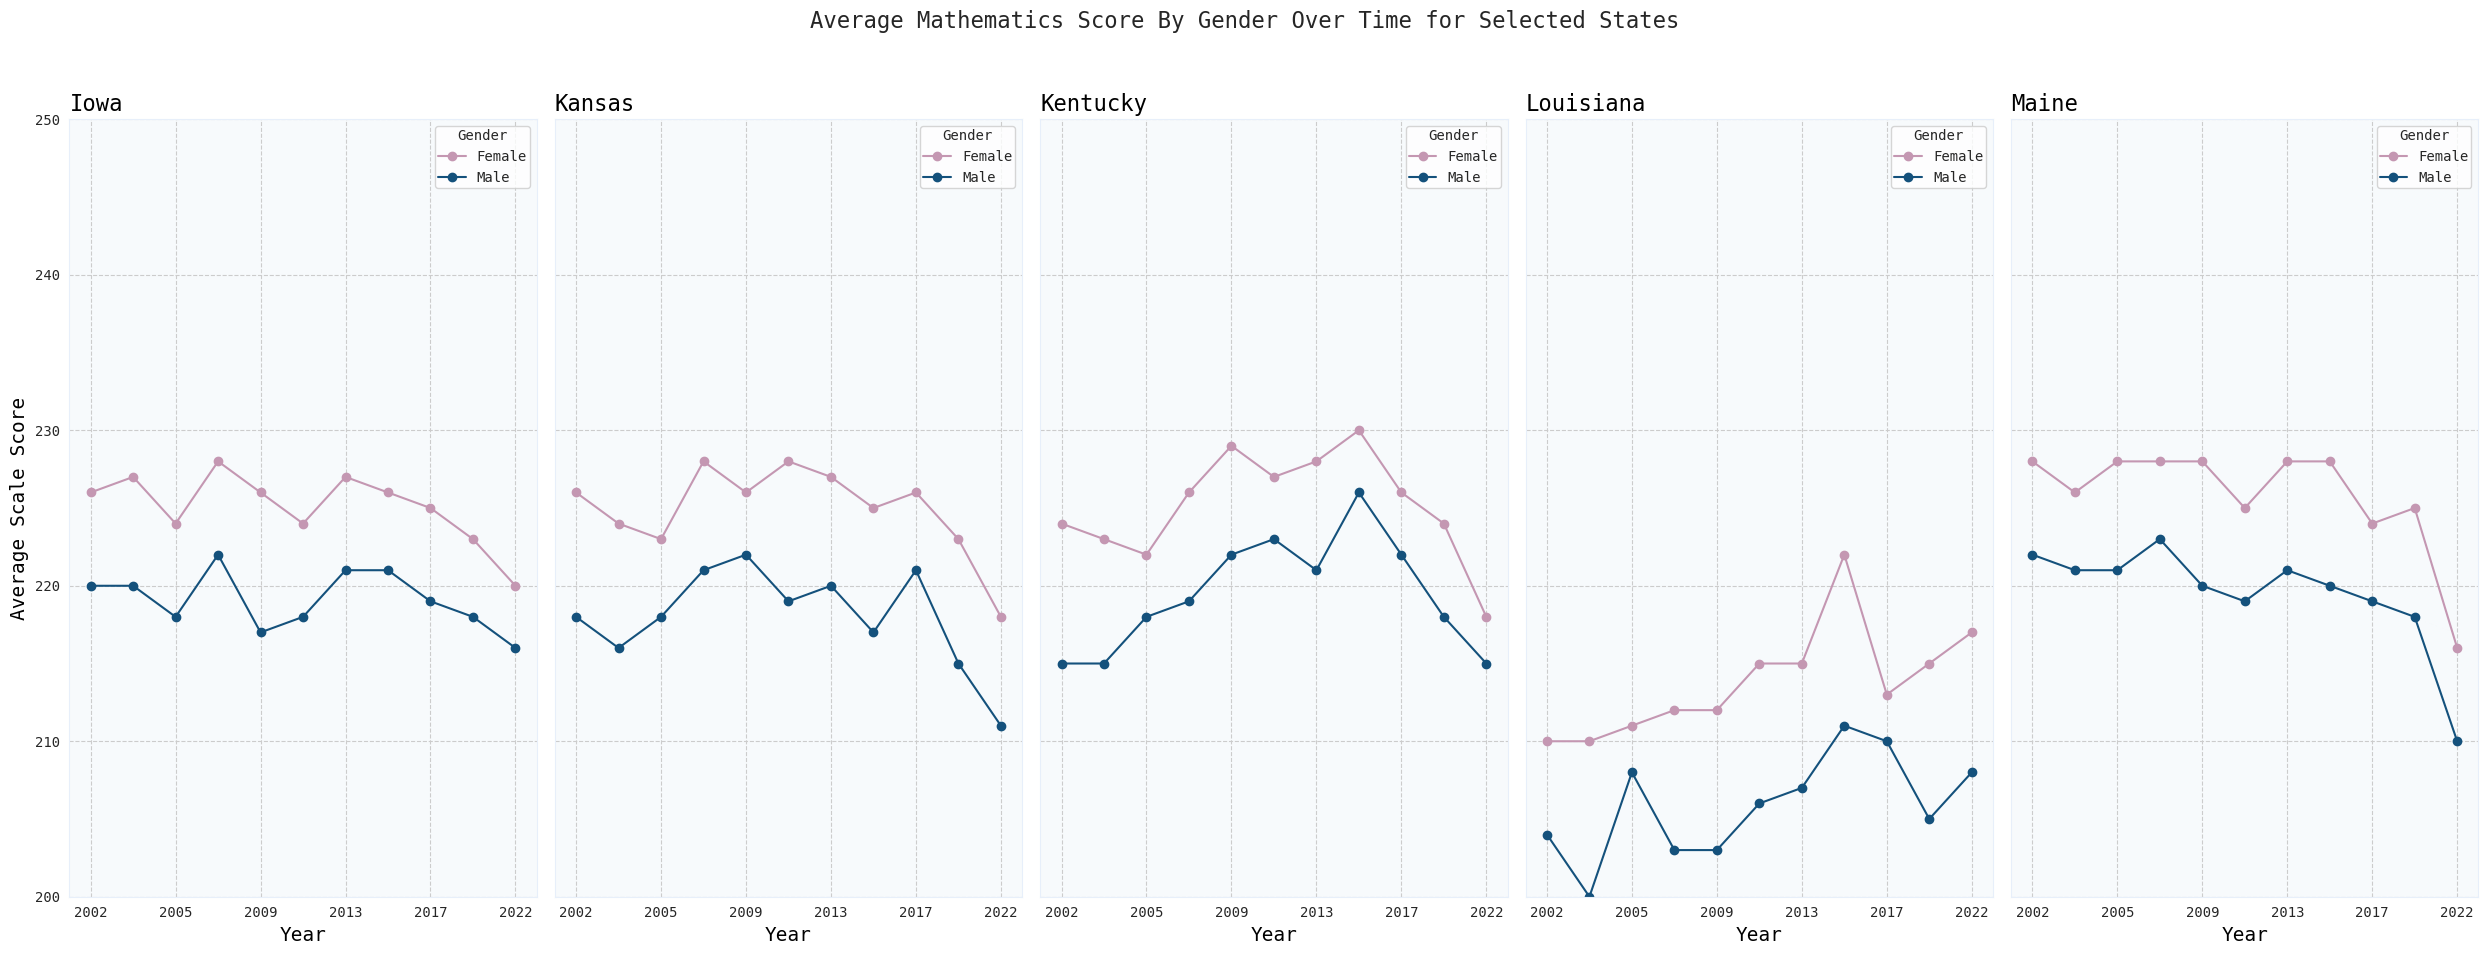

In [67]:
plot(states_4)

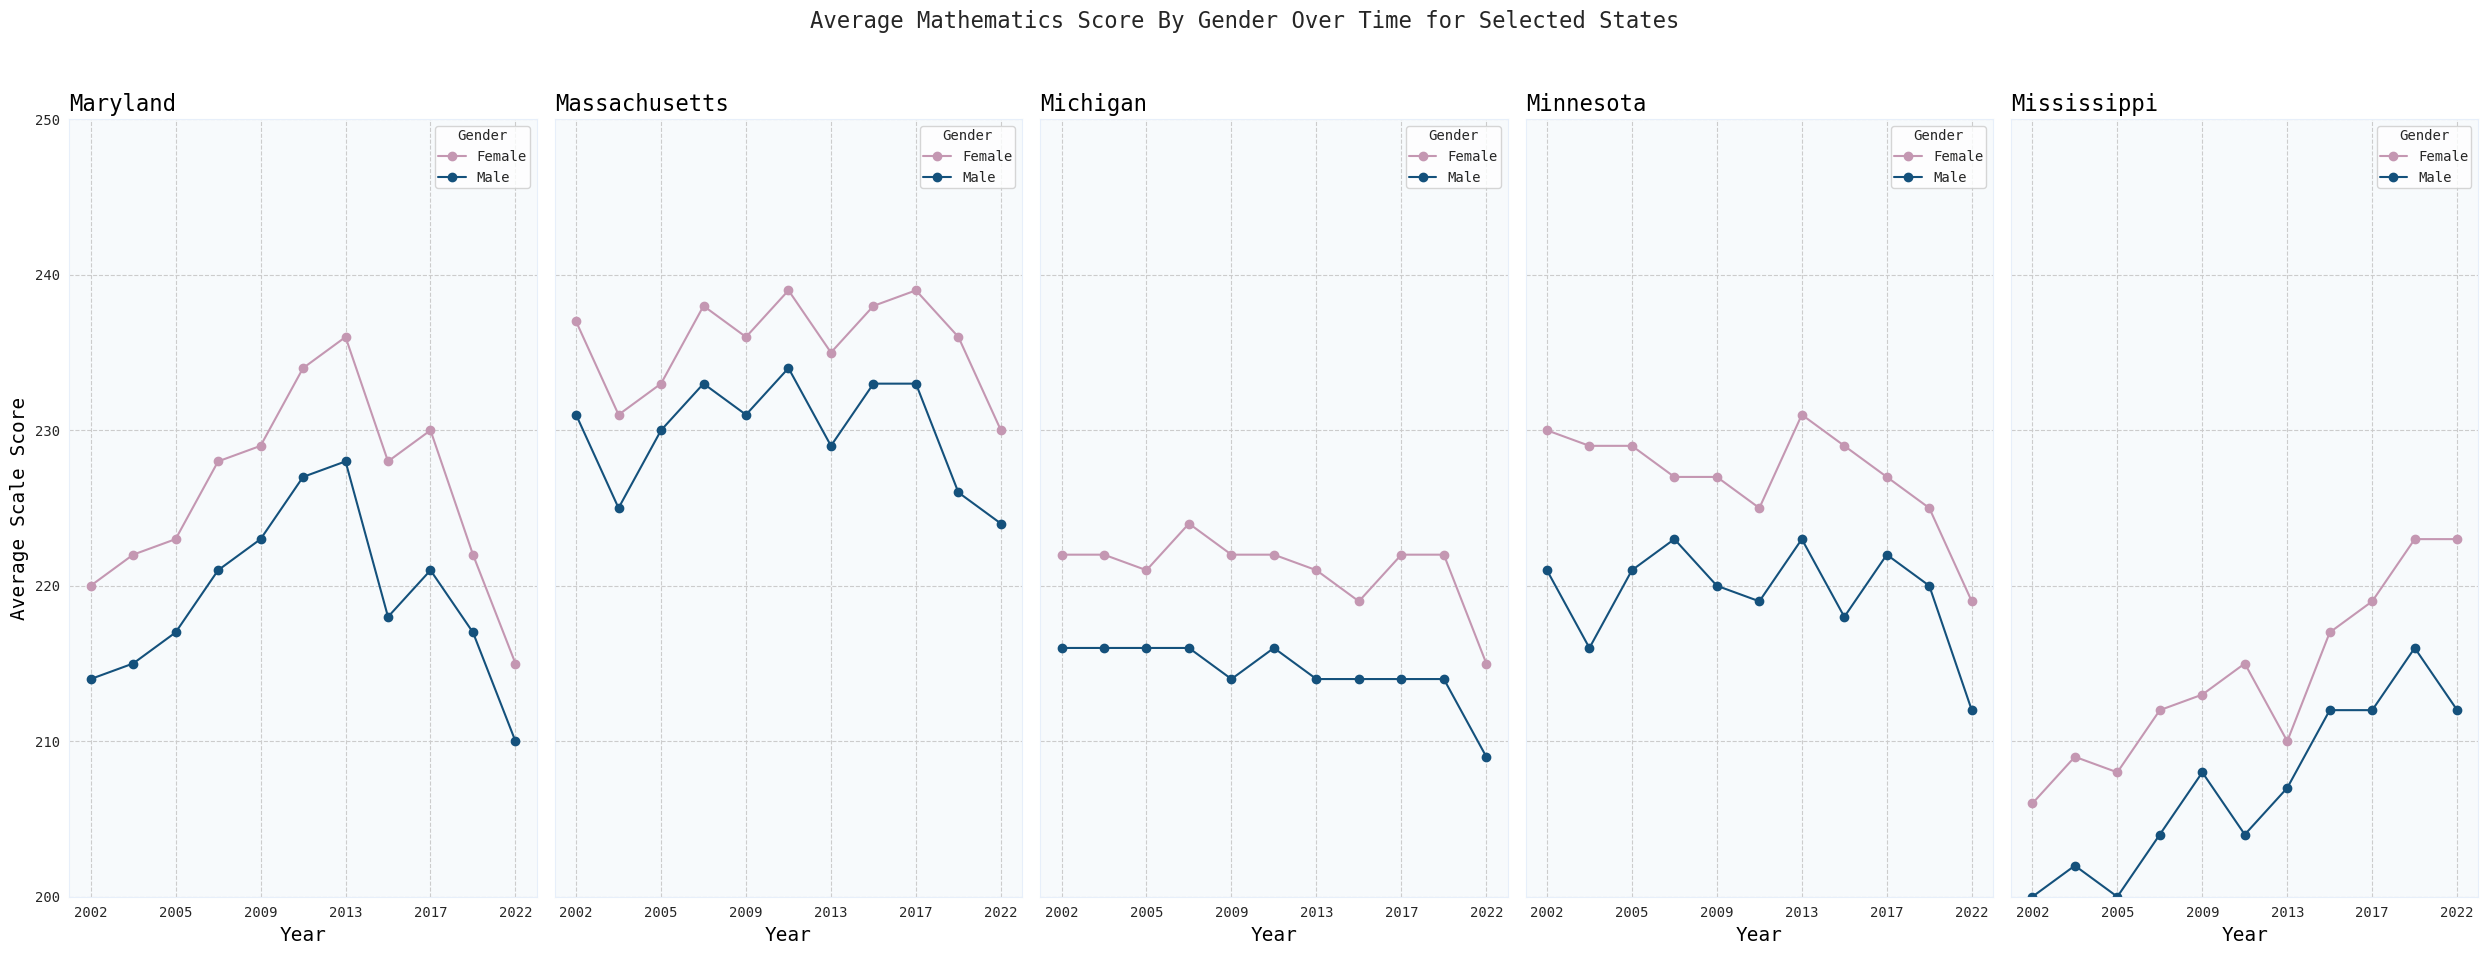

In [68]:
plot(states_5)

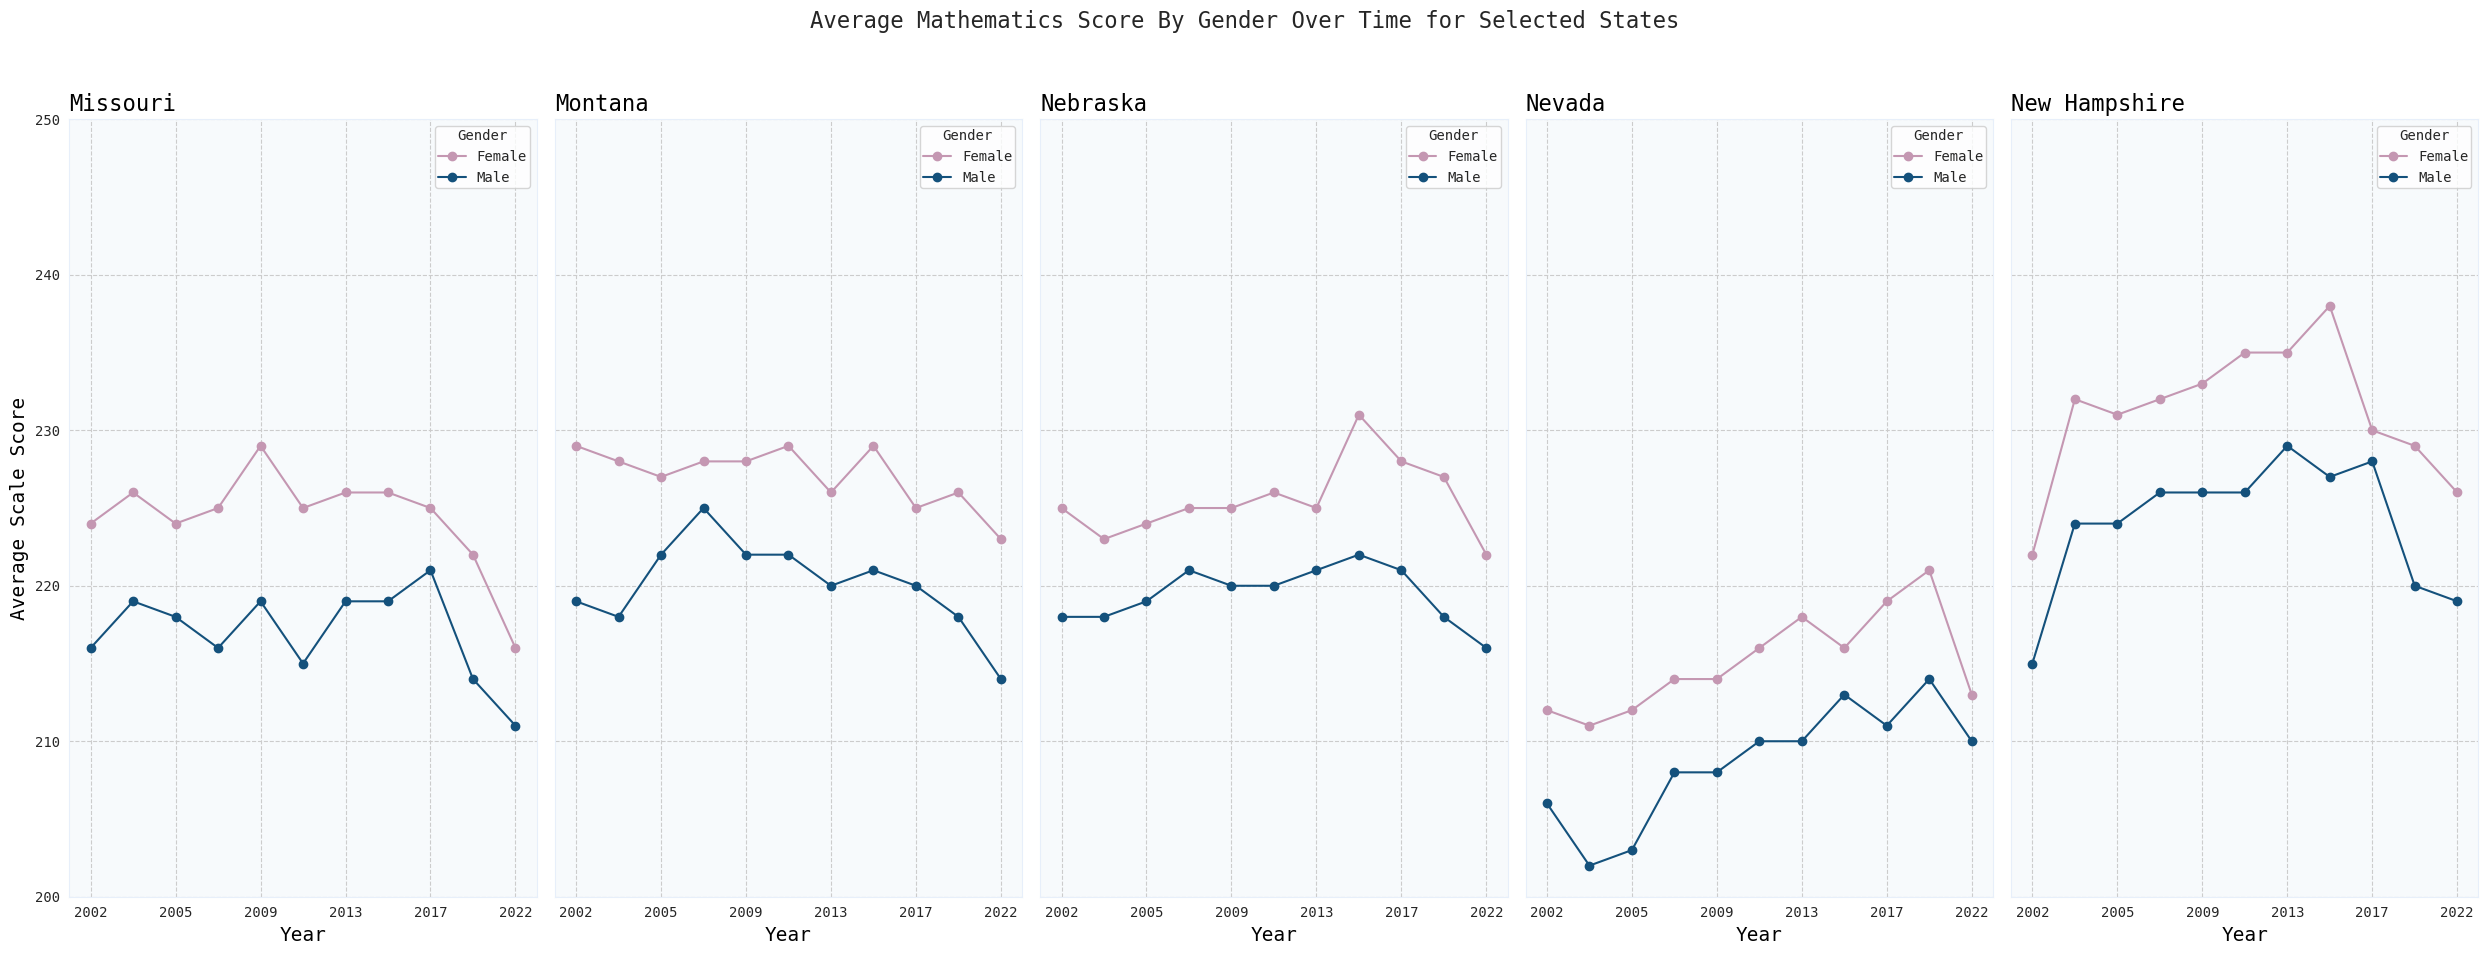

In [69]:
plot(states_6)

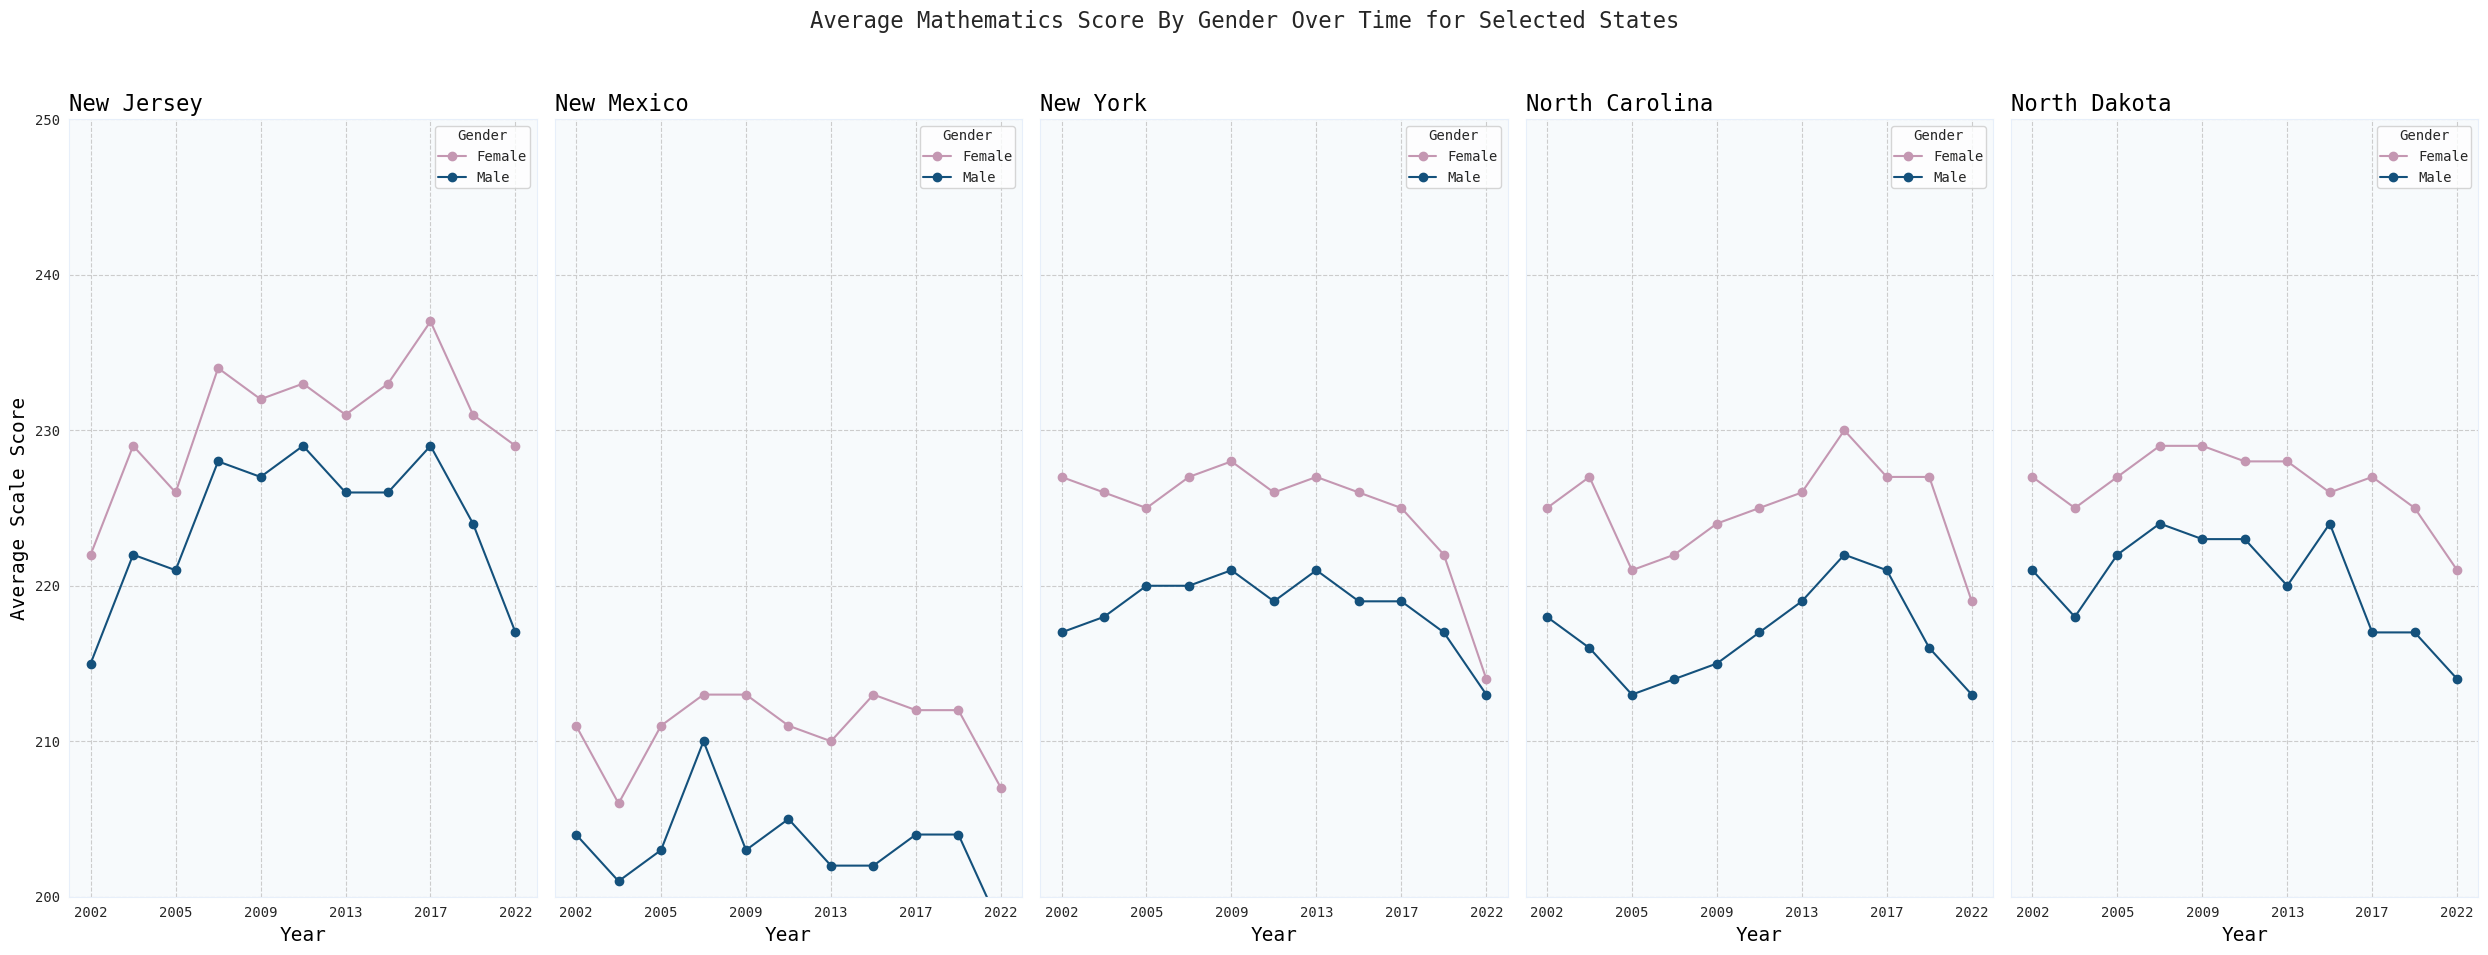

In [70]:
plot(states_7)

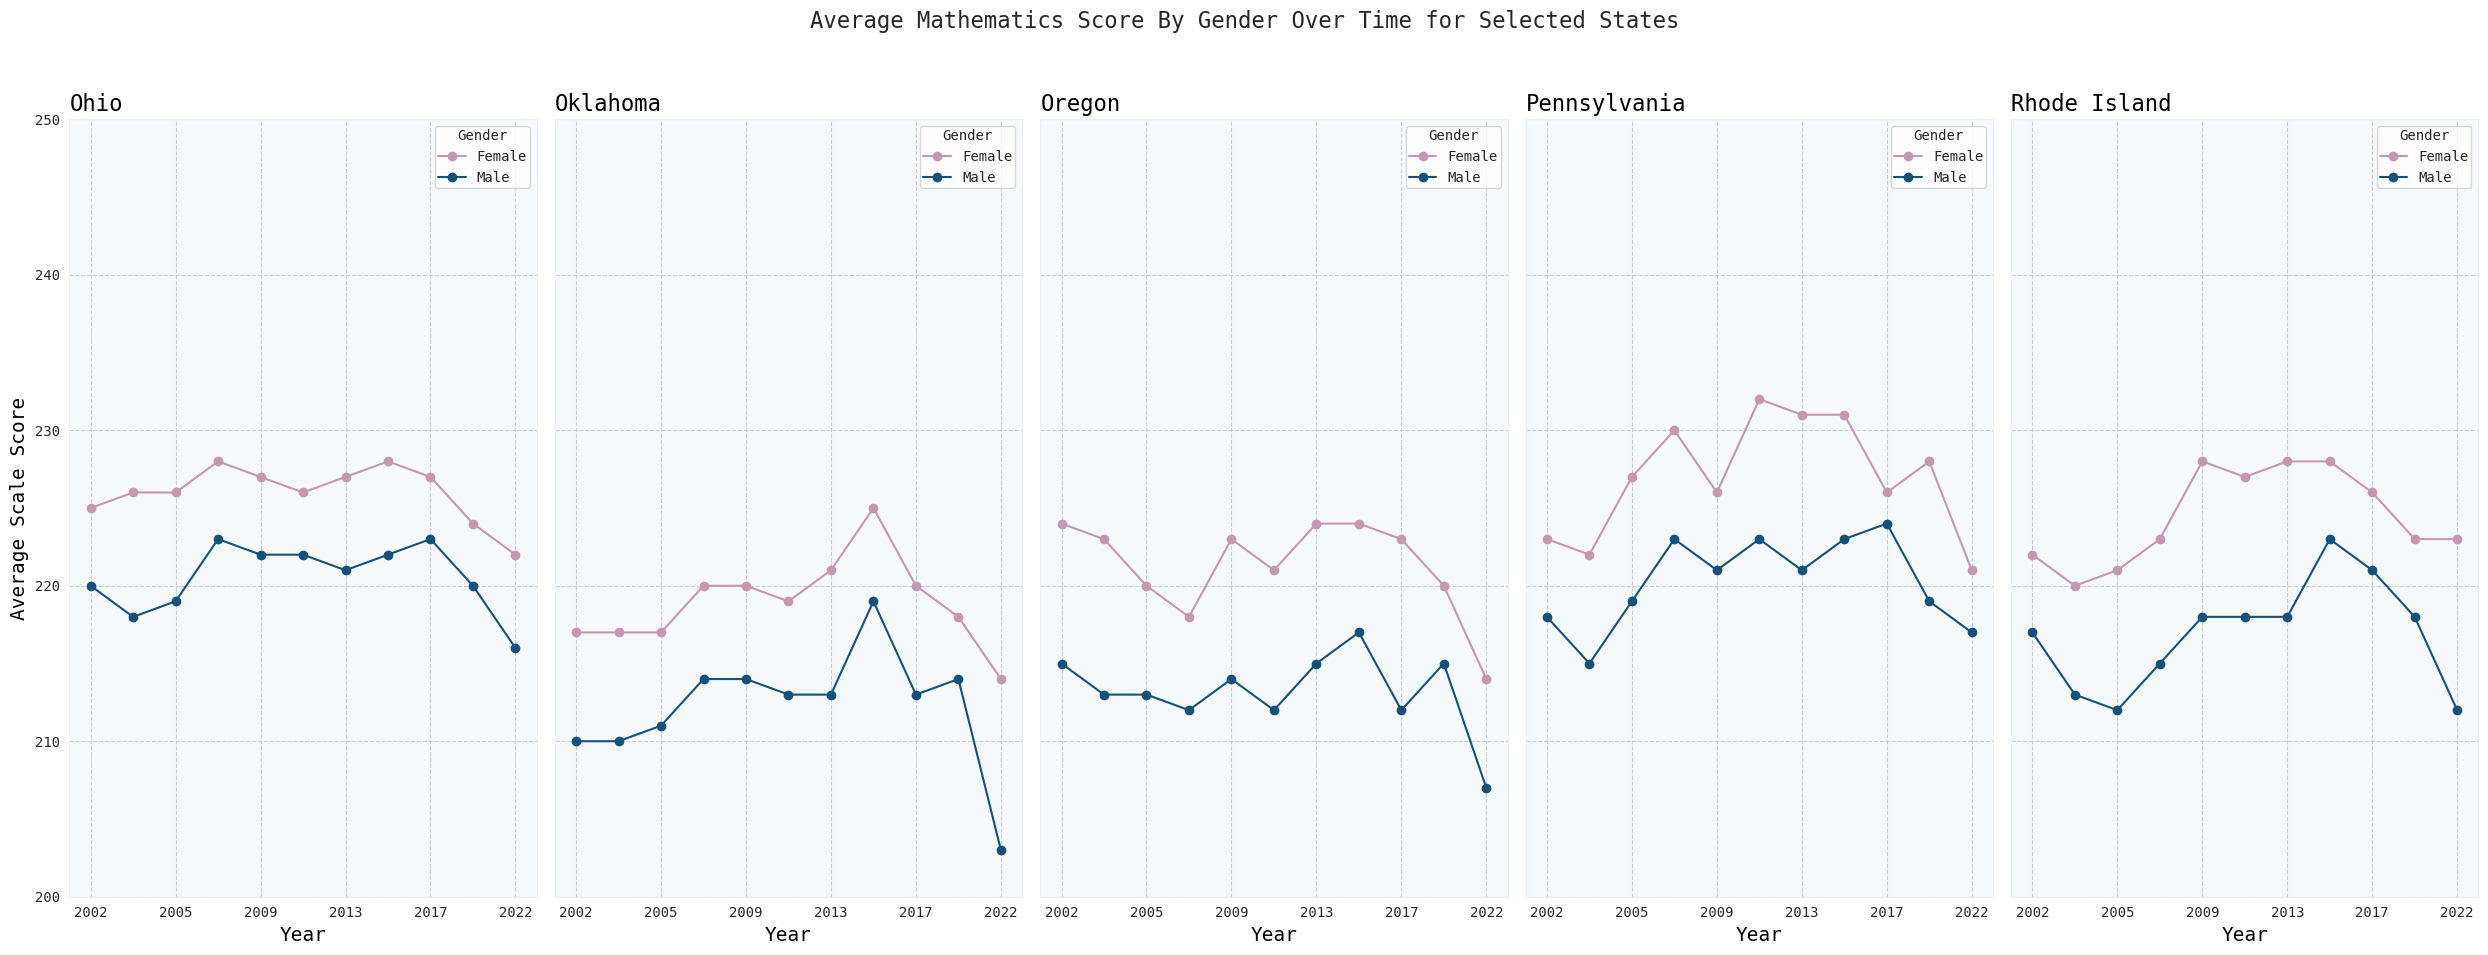

In [71]:
plot(states_8)

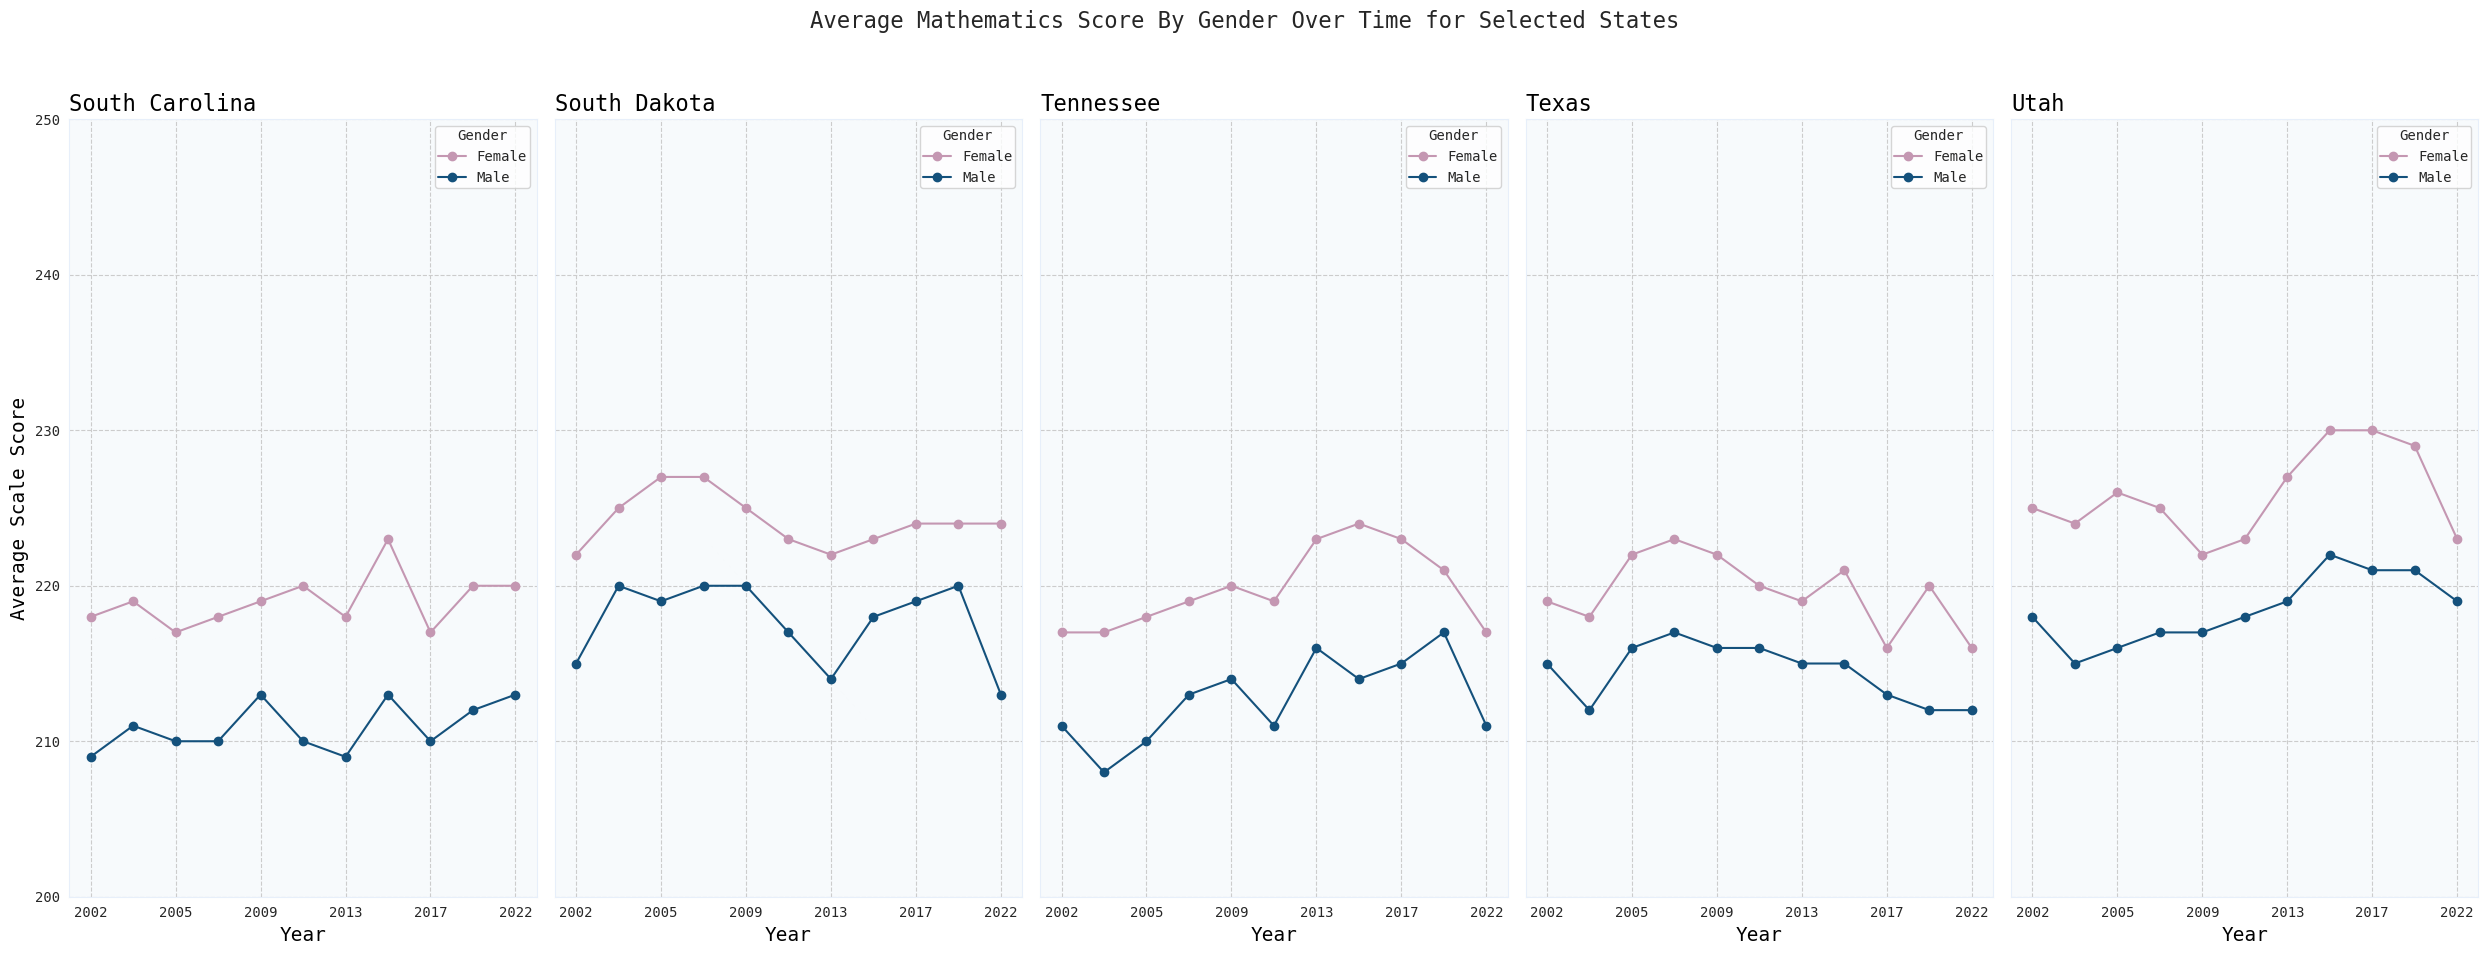

In [72]:
plot(states_9)

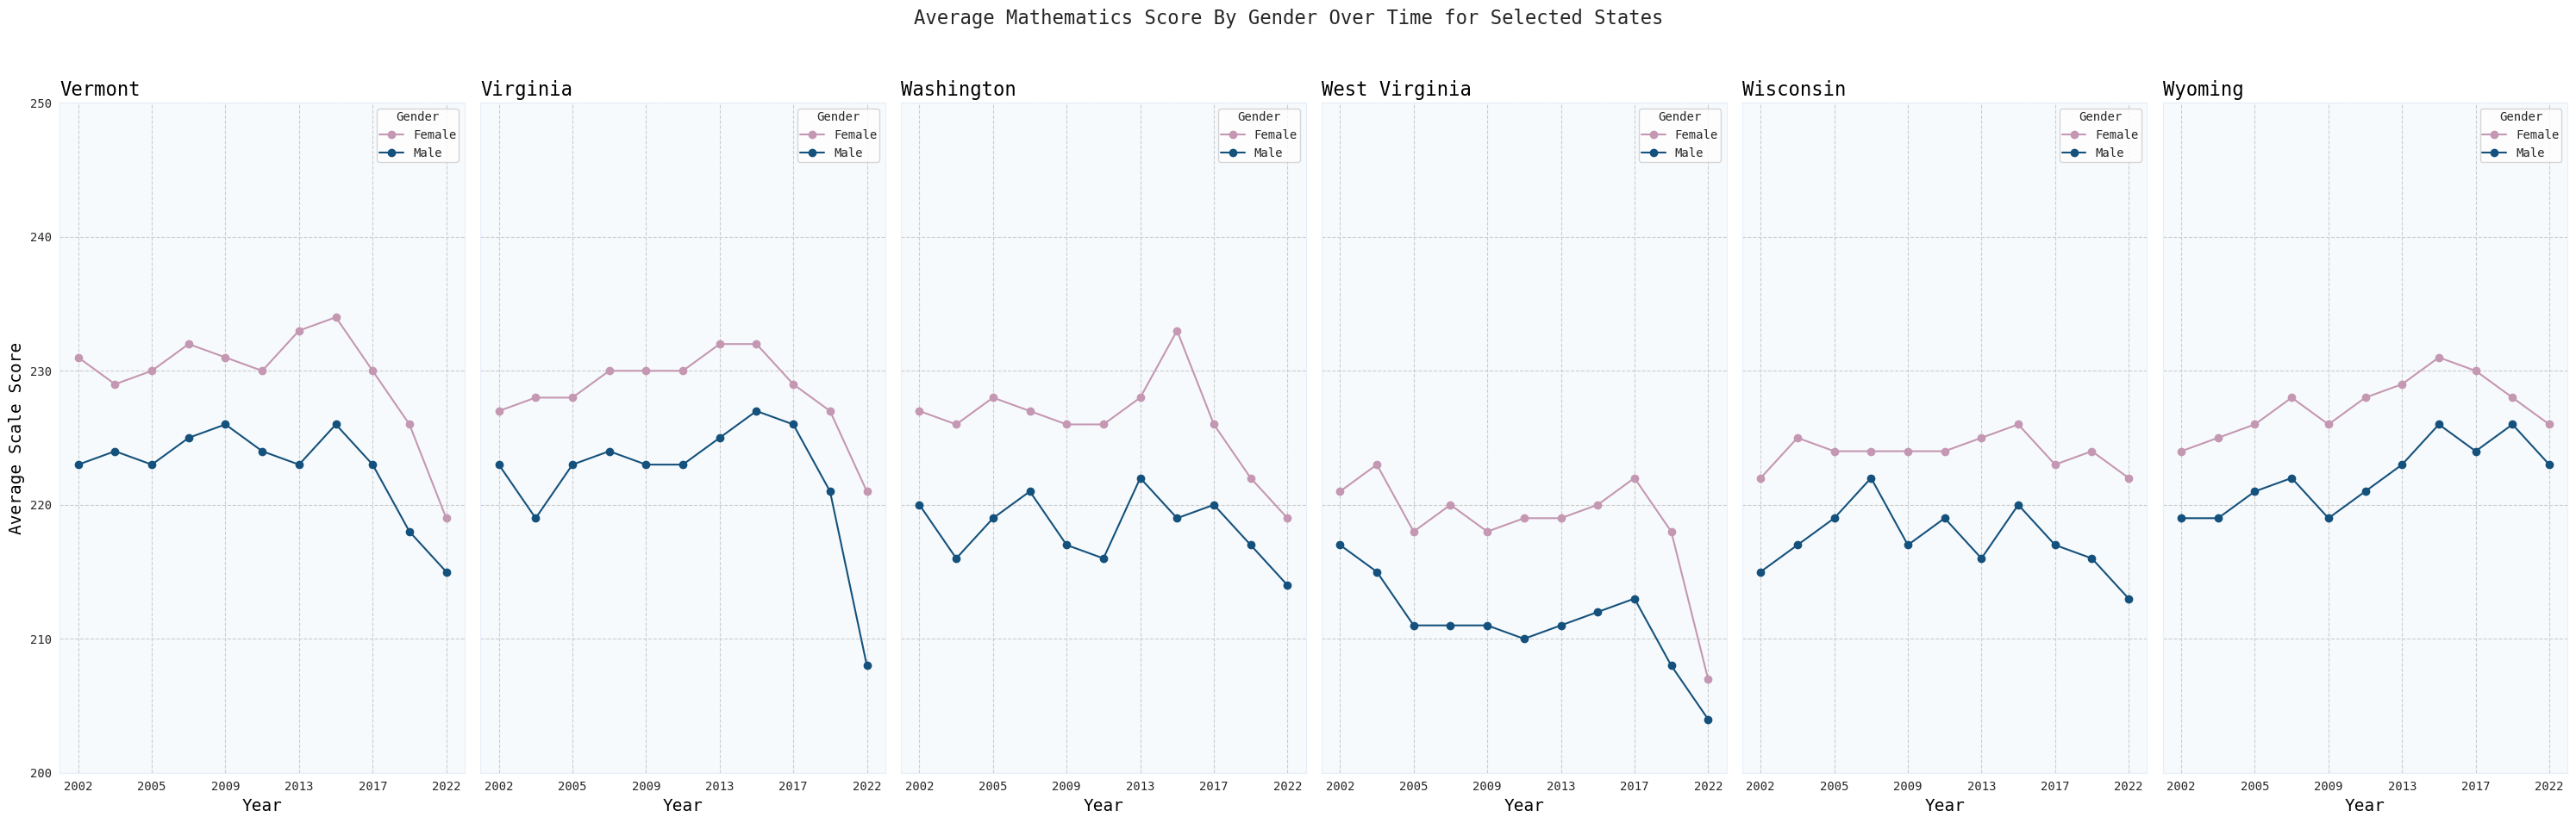

In [73]:
plot(states_10)